In [ ]:
import pandas as pd

# healthy

Correlazione tra le perplexity: 0.4131


Pearson correlation:  0.4131
Spearman correlation: 0.5958


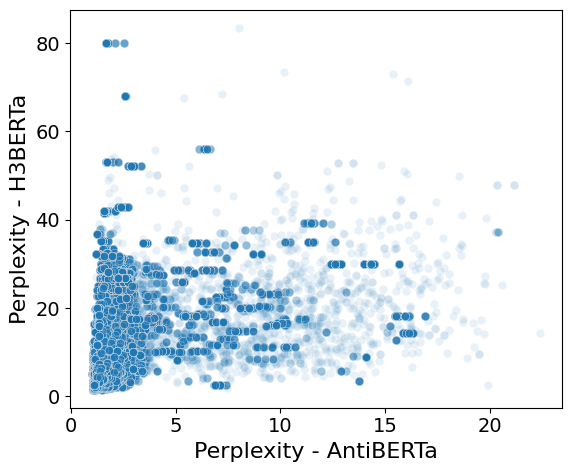

<Figure size 640x480 with 0 Axes>

In [2]:
antiberta = pd.read_csv("./healthy/healthy_repertoire_withcdrh3duplicates_700010496_perplexity_perplexity.csv")
antiberta
h3berta = pd.read_csv("/ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/BEST_RESULTS/H3BERTA:HEALTHY:CDRH3:P3:JUNE2024/H3BERTA_analysis/PERPLEXITY_ANALYSIS/CINCINNATI_REPERTOIRES_PERPLEXITY/cincinnati_repertoires//healthy_repertoire_withcdrh3duplicates_700010496_perplexity_perplexity.csv")
h3berta
# Supponiamo che i due DataFrame si chiamino df1 e df2
# E che entrambi abbiano la colonna "cdrh3" e "perplexity"

# 1. Rinomina le colonne di perplexity per distinguerle
antiberta = antiberta.rename(columns={"perplexity": "perplexity_antiberta"})
h3berta = h3berta.rename(columns={"perplexity": "perplexity_h3berta",'sequence':'cdrh3'})

# 2. Fai un merge sulle sequenze (cdrh3 o sequence, usa quella che è uguale tra i due)
merged = pd.merge(antiberta[["cdrh3", "perplexity_antiberta"]],
                  h3berta[["cdrh3", "perplexity_h3berta"]],
                  on="cdrh3", how="inner")

# 3. Calcola la correlazione
correlation = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])
print(f"Correlazione tra le perplexity: {correlation:.4f}")

from scipy.stats import spearmanr

# Pearson
pearson_corr = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])

# Spearman
spearman_corr, _ = spearmanr(merged["perplexity_antiberta"], merged["perplexity_h3berta"])

print(f"Pearson correlation:  {pearson_corr:.4f}")
print(f"Spearman correlation: {spearman_corr:.4f}")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
# === Plot settings ===
plt.rcParams.update({
    "font.size":       16,
    "axes.titlesize":  18,
    "axes.labelsize":  16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})

sns.scatterplot(data=merged, x="perplexity_antiberta", y="perplexity_h3berta", alpha=0.1)
plt.xlabel("Perplexity - AntiBERTa")
plt.ylabel("Perplexity - H3BERTa")
#plt.title(f"Spearman: {spearman_corr:.2f} | Pearson: {pearson_corr:.2f}")
plt.grid(False)
plt.tight_layout()
plt.show()

plt.savefig("./SI_perplexityh3berta_vs_perpleixtyantiberta.svg", dpi=300, bbox_inches='tight')
plt.savefig("./SI_perplexityh3berta_vs_perpleixtyantiberta.png", dpi=300, bbox_inches='tight')
plt.show()

Correlazione tra le perplexity: 0.4131
Pearson correlation:  0.4131
Spearman correlation: 0.5958


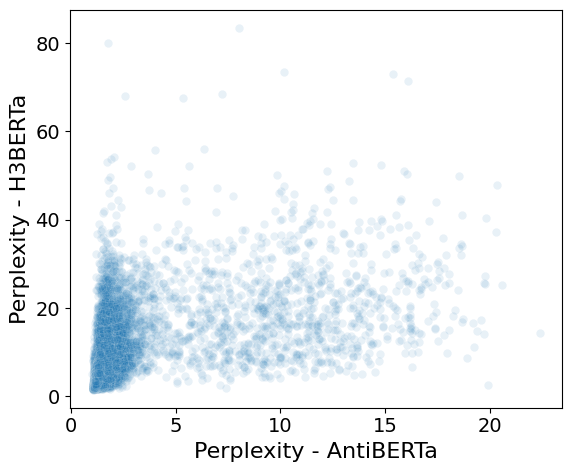

<Figure size 640x480 with 0 Axes>

In [ ]:
#### ONLY UNIQUE CDRH3

antiberta = pd.read_csv("./healthy/healthy_repertoire_withcdrh3duplicates_700010496_perplexity_perplexity.csv")
antiberta
h3berta = pd.read_csv("/ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/BEST_RESULTS/H3BERTA:HEALTHY:CDRH3:P3:JUNE2024/H3BERTA_analysis/PERPLEXITY_ANALYSIS/CINCINNATI_REPERTOIRES_PERPLEXITY/cincinnati_repertoires//healthy_repertoire_withcdrh3duplicates_700010496_perplexity_perplexity.csv")
h3berta
# Supponiamo che i due DataFrame si chiamino df1 e df2
# E che entrambi abbiano la colonna "cdrh3" e "perplexity"

# 1. Rinomina le colonne di perplexity per distinguerle
antiberta = antiberta.rename(columns={"perplexity": "perplexity_antiberta"})
h3berta = h3berta.rename(columns={"perplexity": "perplexity_h3berta",'sequence':'cdrh3'})

# 2. Fai un merge sulle sequenze (cdrh3 o sequence, usa quella che è uguale tra i due)
merged = pd.merge(antiberta[["cdrh3", "perplexity_antiberta"]],
                  h3berta[["cdrh3", "perplexity_h3berta"]],
                  on="cdrh3", how="inner")

# 3. Calcola la correlazione
correlation = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])
print(f"Correlazione tra le perplexity: {correlation:.4f}")

from scipy.stats import spearmanr

# Pearson
pearson_corr = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])

# Spearman
spearman_corr, _ = spearmanr(merged["perplexity_antiberta"], merged["perplexity_h3berta"])

print(f"Pearson correlation:  {pearson_corr:.4f}")
print(f"Spearman correlation: {spearman_corr:.4f}")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
# === Plot settings ===
plt.rcParams.update({
    "font.size":       16,
    "axes.titlesize":  18,
    "axes.labelsize":  16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})

merged_unique = merged.drop_duplicates(subset=["cdrh3"])

sns.scatterplot(data=merged_unique, x="perplexity_antiberta", y="perplexity_h3berta", alpha=0.1)
plt.xlabel("Perplexity - AntiBERTa")
plt.ylabel("Perplexity - H3BERTa")
#plt.title(f"Spearman: {spearman_corr:.2f} | Pearson: {pearson_corr:.2f}")
plt.grid(False)
plt.tight_layout()
plt.show()

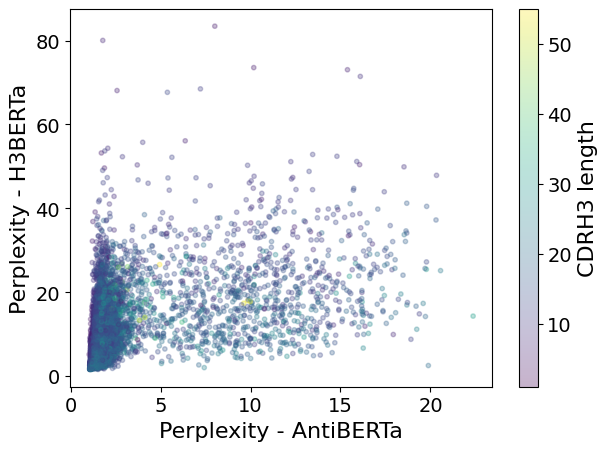

In [9]:
sc = plt.scatter(
    merged_unique["perplexity_antiberta"],
    merged_unique["perplexity_h3berta"],
    c=merged_unique["cdrh3_length"],
    cmap="viridis",
    alpha=0.3,
    s=10
)

plt.xlabel("Perplexity - AntiBERTa")
plt.ylabel("Perplexity - H3BERTa")
plt.colorbar(sc, label="CDRH3 length")  # aggiunge la barra continua
plt.grid(False)
plt.tight_layout()

plt.savefig("./SI_perplexityh3berta_vs_perpleixtyantiberta_unique.svg", dpi=300, bbox_inches='tight')
plt.savefig("./SI_perplexityh3berta_vs_perpleixtyantiberta_unique.png", dpi=300, bbox_inches='tight')
plt.show()


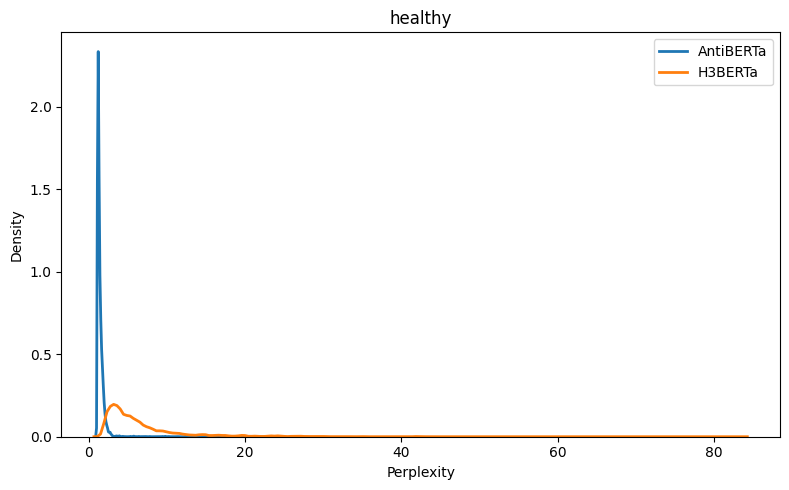

In [6]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=merged, x="perplexity_antiberta", label="AntiBERTa", linewidth=2)
sns.kdeplot(data=merged, x="perplexity_h3berta", label="H3BERTa", linewidth=2)
plt.xlabel("Perplexity")
plt.ylabel("Density")
plt.title("healthy")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


Correlazione tra le perplexity: 0.4263
Pearson correlation:  0.4263
Spearman correlation: 0.5872


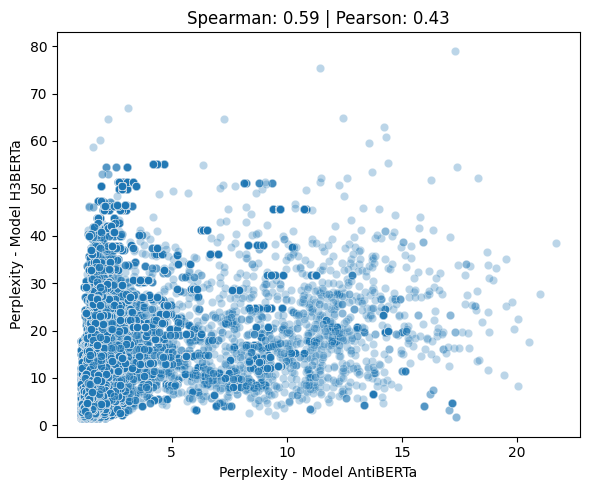

In [5]:
antiberta = pd.read_csv("./healthy/healthy_repertoire_withcdrh3duplicates_704010221_perplexity_perplexity.csv")
antiberta
h3berta = pd.read_csv("/ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/BEST_RESULTS/H3BERTA:HEALTHY:CDRH3:P3:JUNE2024/H3BERTA_analysis/PERPLEXITY_ANALYSIS/CINCINNATI_REPERTOIRES_PERPLEXITY/cincinnati_repertoires/healthy_repertoire_withcdrh3duplicates_704010221_perplexity_perplexity.csv")
h3berta
# Supponiamo che i due DataFrame si chiamino df1 e df2
# E che entrambi abbiano la colonna "cdrh3" e "perplexity"

# 1. Rinomina le colonne di perplexity per distinguerle
antiberta = antiberta.rename(columns={"perplexity": "perplexity_antiberta"})
h3berta = h3berta.rename(columns={"perplexity": "perplexity_h3berta",'sequence':'cdrh3'})

# 2. Fai un merge sulle sequenze (cdrh3 o sequence, usa quella che è uguale tra i due)
merged = pd.merge(antiberta[["cdrh3", "perplexity_antiberta"]],
                  h3berta[["cdrh3", "perplexity_h3berta"]],
                  on="cdrh3", how="inner")

# 3. Calcola la correlazione
correlation = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])
print(f"Correlazione tra le perplexity: {correlation:.4f}")

from scipy.stats import spearmanr

# Pearson
pearson_corr = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])

# Spearman
spearman_corr, _ = spearmanr(merged["perplexity_antiberta"], merged["perplexity_h3berta"])

print(f"Pearson correlation:  {pearson_corr:.4f}")
print(f"Spearman correlation: {spearman_corr:.4f}")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.scatterplot(data=merged, x="perplexity_antiberta", y="perplexity_h3berta", alpha=0.3)
plt.xlabel("Perplexity - Model AntiBERTa")
plt.ylabel("Perplexity - Model H3BERTa")
plt.title(f"Spearman: {spearman_corr:.2f} | Pearson: {pearson_corr:.2f}")
plt.grid(False)
plt.tight_layout()
plt.show()



# bnabs

Correlazione tra le perplexity: 0.3896
Pearson correlation:  0.3896
Spearman correlation: 0.5172


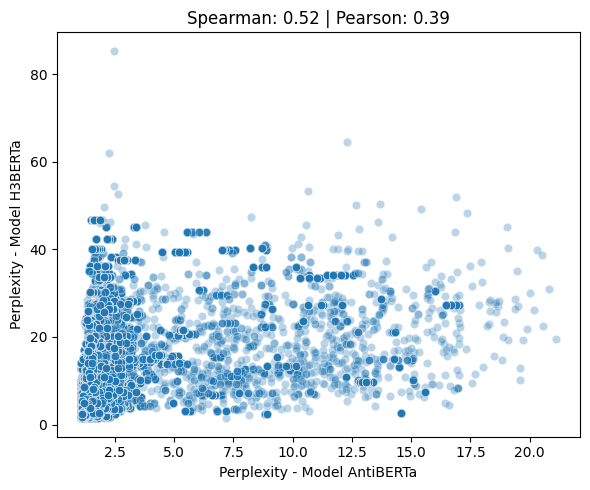

In [9]:
antiberta = pd.read_csv("./bnabs/bnabs_repertoire_withcdrh3duplicates_707010134_perplexity_perplexity.csv")
antiberta
h3berta = pd.read_csv("/ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/BEST_RESULTS/H3BERTA:HEALTHY:CDRH3:P3:JUNE2024/H3BERTA_analysis/PERPLEXITY_ANALYSIS/CINCINNATI_REPERTOIRES_PERPLEXITY/cincinnati_repertoires//bnabs_repertoire_withcdrh3duplicates_707010134_perplexity_perplexity.csv")
h3berta
# Supponiamo che i due DataFrame si chiamino df1 e df2
# E che entrambi abbiano la colonna "cdrh3" e "perplexity"

# 1. Rinomina le colonne di perplexity per distinguerle
antiberta = antiberta.rename(columns={"perplexity": "perplexity_antiberta"})
h3berta = h3berta.rename(columns={"perplexity": "perplexity_h3berta",'sequence':'cdrh3'})

# 2. Fai un merge sulle sequenze (cdrh3 o sequence, usa quella che è uguale tra i due)
merged = pd.merge(antiberta[["cdrh3", "perplexity_antiberta"]],
                  h3berta[["cdrh3", "perplexity_h3berta"]],
                  on="cdrh3", how="inner")

# 3. Calcola la correlazione
correlation = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])
print(f"Correlazione tra le perplexity: {correlation:.4f}")

from scipy.stats import spearmanr

# Pearson
pearson_corr = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])

# Spearman
spearman_corr, _ = spearmanr(merged["perplexity_antiberta"], merged["perplexity_h3berta"])

print(f"Pearson correlation:  {pearson_corr:.4f}")
print(f"Spearman correlation: {spearman_corr:.4f}")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.scatterplot(data=merged, x="perplexity_antiberta", y="perplexity_h3berta", alpha=0.3)
plt.xlabel("Perplexity - Model AntiBERTa")
plt.ylabel("Perplexity - Model H3BERTa")
plt.title(f"Spearman: {spearman_corr:.2f} | Pearson: {pearson_corr:.2f}")
plt.grid(False)
plt.tight_layout()
plt.show()



Correlazione tra le perplexity: 0.5242
Pearson correlation:  0.5242
Spearman correlation: 0.6180


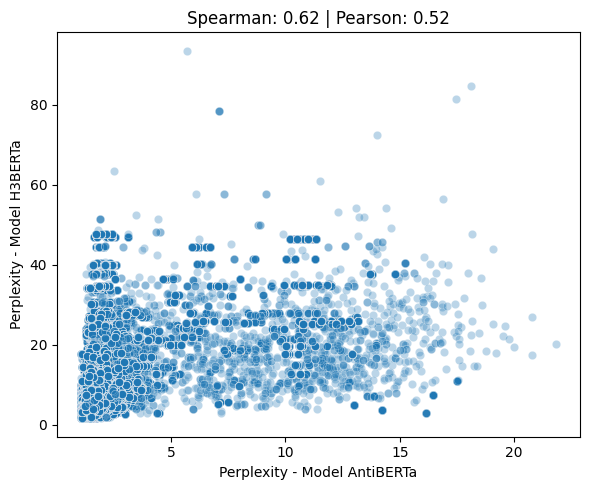

In [7]:
antiberta = pd.read_csv("./bnabs/bnabs_repertoire_withcdrh3duplicates_703010564_perplexity_perplexity.csv")
antiberta
h3berta = pd.read_csv("/ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/BEST_RESULTS/H3BERTA:HEALTHY:CDRH3:P3:JUNE2024/H3BERTA_analysis/PERPLEXITY_ANALYSIS/CINCINNATI_REPERTOIRES_PERPLEXITY/cincinnati_repertoires//bnabs_repertoire_withcdrh3duplicates_703010564_perplexity_perplexity.csv")
h3berta
# Supponiamo che i due DataFrame si chiamino df1 e df2
# E che entrambi abbiano la colonna "cdrh3" e "perplexity"

# 1. Rinomina le colonne di perplexity per distinguerle
antiberta = antiberta.rename(columns={"perplexity": "perplexity_antiberta"})
h3berta = h3berta.rename(columns={"perplexity": "perplexity_h3berta",'sequence':'cdrh3'})

# 2. Fai un merge sulle sequenze (cdrh3 o sequence, usa quella che è uguale tra i due)
merged = pd.merge(antiberta[["cdrh3", "perplexity_antiberta"]],
                  h3berta[["cdrh3", "perplexity_h3berta"]],
                  on="cdrh3", how="inner")

# 3. Calcola la correlazione
correlation = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])
print(f"Correlazione tra le perplexity: {correlation:.4f}")

from scipy.stats import spearmanr

# Pearson
pearson_corr = merged["perplexity_antiberta"].corr(merged["perplexity_h3berta"])

# Spearman
spearman_corr, _ = spearmanr(merged["perplexity_antiberta"], merged["perplexity_h3berta"])

print(f"Pearson correlation:  {pearson_corr:.4f}")
print(f"Spearman correlation: {spearman_corr:.4f}")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.scatterplot(data=merged, x="perplexity_antiberta", y="perplexity_h3berta", alpha=0.3)
plt.xlabel("Perplexity - Model AntiBERTa")
plt.ylabel("Perplexity - Model H3BERTa")
plt.title(f"Spearman: {spearman_corr:.2f} | Pearson: {pearson_corr:.2f}")
plt.grid(False)
plt.tight_layout()
plt.show()



In [7]:
!pwd

/ibmm_data/rodelc/DALM/CLS_bnAbs/CDRH3/BEST_RESULTS/H3BERTA:HEALTHY:CDRH3:P3:JUNE2024/H3BERTA_analysis/PERPLEXITY_ANALYSIS/CINCINNATI_REPERTOIRES_PERPLEXITY/AntiBERTA_comparison/cincinnati_repertoires


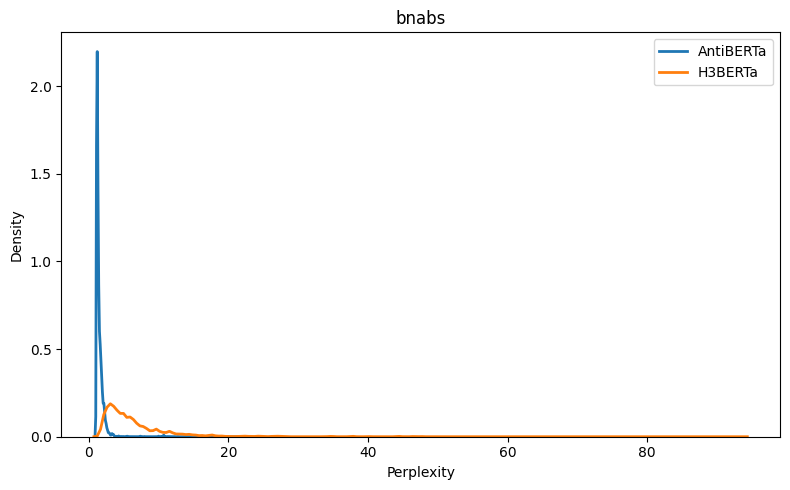

In [8]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=merged, x="perplexity_antiberta", label="AntiBERTa", linewidth=2)
sns.kdeplot(data=merged, x="perplexity_h3berta", label="H3BERTa", linewidth=2)
plt.xlabel("Perplexity")
plt.ylabel("Density")
plt.title("bnabs")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
